# Imports

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Funções

## Gerar Metadados

In [30]:
#Verificar os meta dados do DataFrame
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

## Boxplots

In [31]:
def pod_academy_box_plot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas 
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

In [32]:
def box_plot(dataframe, column):
    """
    Plota um boxplot estilizado para a coluna especificada do dataframe fornecido.

    :param dataframe: DataFrame para o qual o boxplot será gerado.
    :param column: Nome da coluna para a qual o boxplot será gerado.
    """
    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=dataframe[column], color="skyblue")
    plt.title(f'Boxplot da variável {column}', fontsize=16, fontweight='bold')
    plt.ylabel('')
    plt.tick_params(axis='both', which='major', labelsize=12)

## Histogramas

In [33]:
def pod_academy_histograms(dataframe):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue", bins=30, kde=True)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.05)

In [34]:
def histogram(dataframe, column):
    """
    Plota um histograma corrigido com a curva KDE (Kernel Density Estimation) para a coluna especificada
    do dataframe fornecido.

    :param dataframe: DataFrame para o qual o histograma será gerado.
    :param column: Nome da coluna para a qual o histograma será gerado.
    """
    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histograma com KDE
    plt.figure(figsize=(8, 5))
    sns.histplot(data=dataframe[column], color="skyblue", bins=30, kde=True)
    plt.title(f'Histograma com KDE da variável {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.tick_params(axis='both', which='major', labelsize=12)

## Frequencia categórica

In [35]:
def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

# Testa a função com os dados e o corte padrão de cardinalidade
#plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2)


# Objetivo:

Compreender as tendências, padrões e características das vendas farmacêuticas em diferentes regiões e demografias.

In [36]:
# Abrir o CSV dos Medicamentos Industrializados de de Novembro de 2021
df_industrial_medics = pd.read_csv('EDA_Industrializados_202111_sample.csv')

df_industrial_medics.shape

(200000, 16)

In [37]:
# Vamos ver a disposição dos dados na tabela
df_industrial_medics.head()

,Unnamed: 0,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
0,5310,2021,11,CE,FORTALEZA,OXCARBAZEPINA,300 MG COM REV CT BL AL AL X 30,3,CAIXA,CRM,CE,1.0,NaN,NaN,NaN,NaN
1,3356,2021,11,RJ,RIO DE JANEIRO,CLORIDRATO DE MOXIFLOXACINO,5 MG/ML SOL OFT CT FR PLAS TRANS GOT X 5 ML,1,CAIXA,CRM,RJ,5.0,NaN,2.0,50.0,1.0
2,137131,2021,11,RJ,RIO DE JANEIRO,SULFADIAZINA DE PRATA,10 MG / G CREM DERM CT BG AL REV X 50 G,2,CAIXA,CRM,RJ,5.0,NaN,2.0,75.0,1.0
3,202348,2021,11,PR,ROLÂNDIA,ALPRAZOLAM,2 MG COM CT BL AL PLAS INC X 30,4,FRASCO,CRM,PR,2.0,NaN,NaN,NaN,NaN
4,152609,2021,11,RJ,SÃO GONÇALO,AMOXICILINA + CLAVULANATO DE POTÁSSIO,(500+125) MG COM REV CT STR AL/AL X 18,2,CAIXA,CRM,RJ,5.0,NaN,1.0,23.0,1.0


É importante sabermos o que signifiicam algumas da variáveis não tão obvias como 'TIPO_RECEITUARIO', 'UNIDADE_IDADE', 'CID10'//
*COLOCAR A DESCRIÇÃO DAS VARIÁVEIS*

Precisamos ver agora os metadados e como estao distribuidos, nulos e cardinalidade

In [38]:
generate_metadata(df_industrial_medics)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,Unnamed: 0,int64,0,0.00,200000
1,ANO_VENDA,int64,0,0.00,1
2,MES_VENDA,int64,0,0.00,1
3,QTD_VENDIDA,int64,0,0.00,434
4,TIPO_RECEITUARIO,float64,0,0.00,5
5,SEXO,float64,68884,34.44,2
6,IDADE,float64,68884,34.44,180
7,UNIDADE_IDADE,float64,68884,34.44,2
8,UF_VENDA,object,0,0.00,15
9,MUNICIPIO_VENDA,object,0,0.00,352


# Atividades a serem desenvolvidas

## 1. Limpeza e Pré-processamento de Dados:

* Lidar com valores ausentes: Decidir se vai imputar, preencher ou remover linhas/colunas com dados faltantes.

1. Podemos identificar de imediato que a quantidade de nulos para 'SEXO', 'IDADE' e 'UNIDADE_IDADE', e igual, indicando uma correlação da origem desses dados, esses nulos em específico talvez seja melhor não alterar e não incluir nas análises

2. Em relação á variável de 'PRINCIPIO_ATIVO' temos uma porcentagem de apenas 0,19 de dados faltantes, para não descartar quase 400 linhas podemos substituir esses valores pela mediana, dessa forma a distrituição dos outros valores fica relativamenete semelhante

3. Agora a variável 'CID10' possui 99.9% de valores nulos, basicamente inutilizando a coluna para análises

In [39]:
# Agora vamos calcular a mediana da curva de frequência de de 'PRINCIPIO_ATIVO'
mdn = df_industrial_medics['PRINCIPIO_ATIVO'].value_counts().median()

# Agora precisamosa saber qual o(s) principio(s) ativo(s) que apareceram possuem frequencia na mediana
mdn_actv_prin = df_industrial_medics['PRINCIPIO_ATIVO'].value_counts()[df_industrial_medics['PRINCIPIO_ATIVO'].value_counts() == mdn]

# Por ultimo substituimos os valores nulos da coluna 'PRINCIPIO_ATIVO' por DONEPEZILA  
df_industrial_medics['PRINCIPIO_ATIVO'].fillna('DONEPEZILA', inplace=True)

* Tratar outliers: Identificar e lidar com outliers que podem distorcer a análise.


1. Para tratar outliers podemos plotar Boxplots e/ou Histogramas (geralmente em distribuição normal)

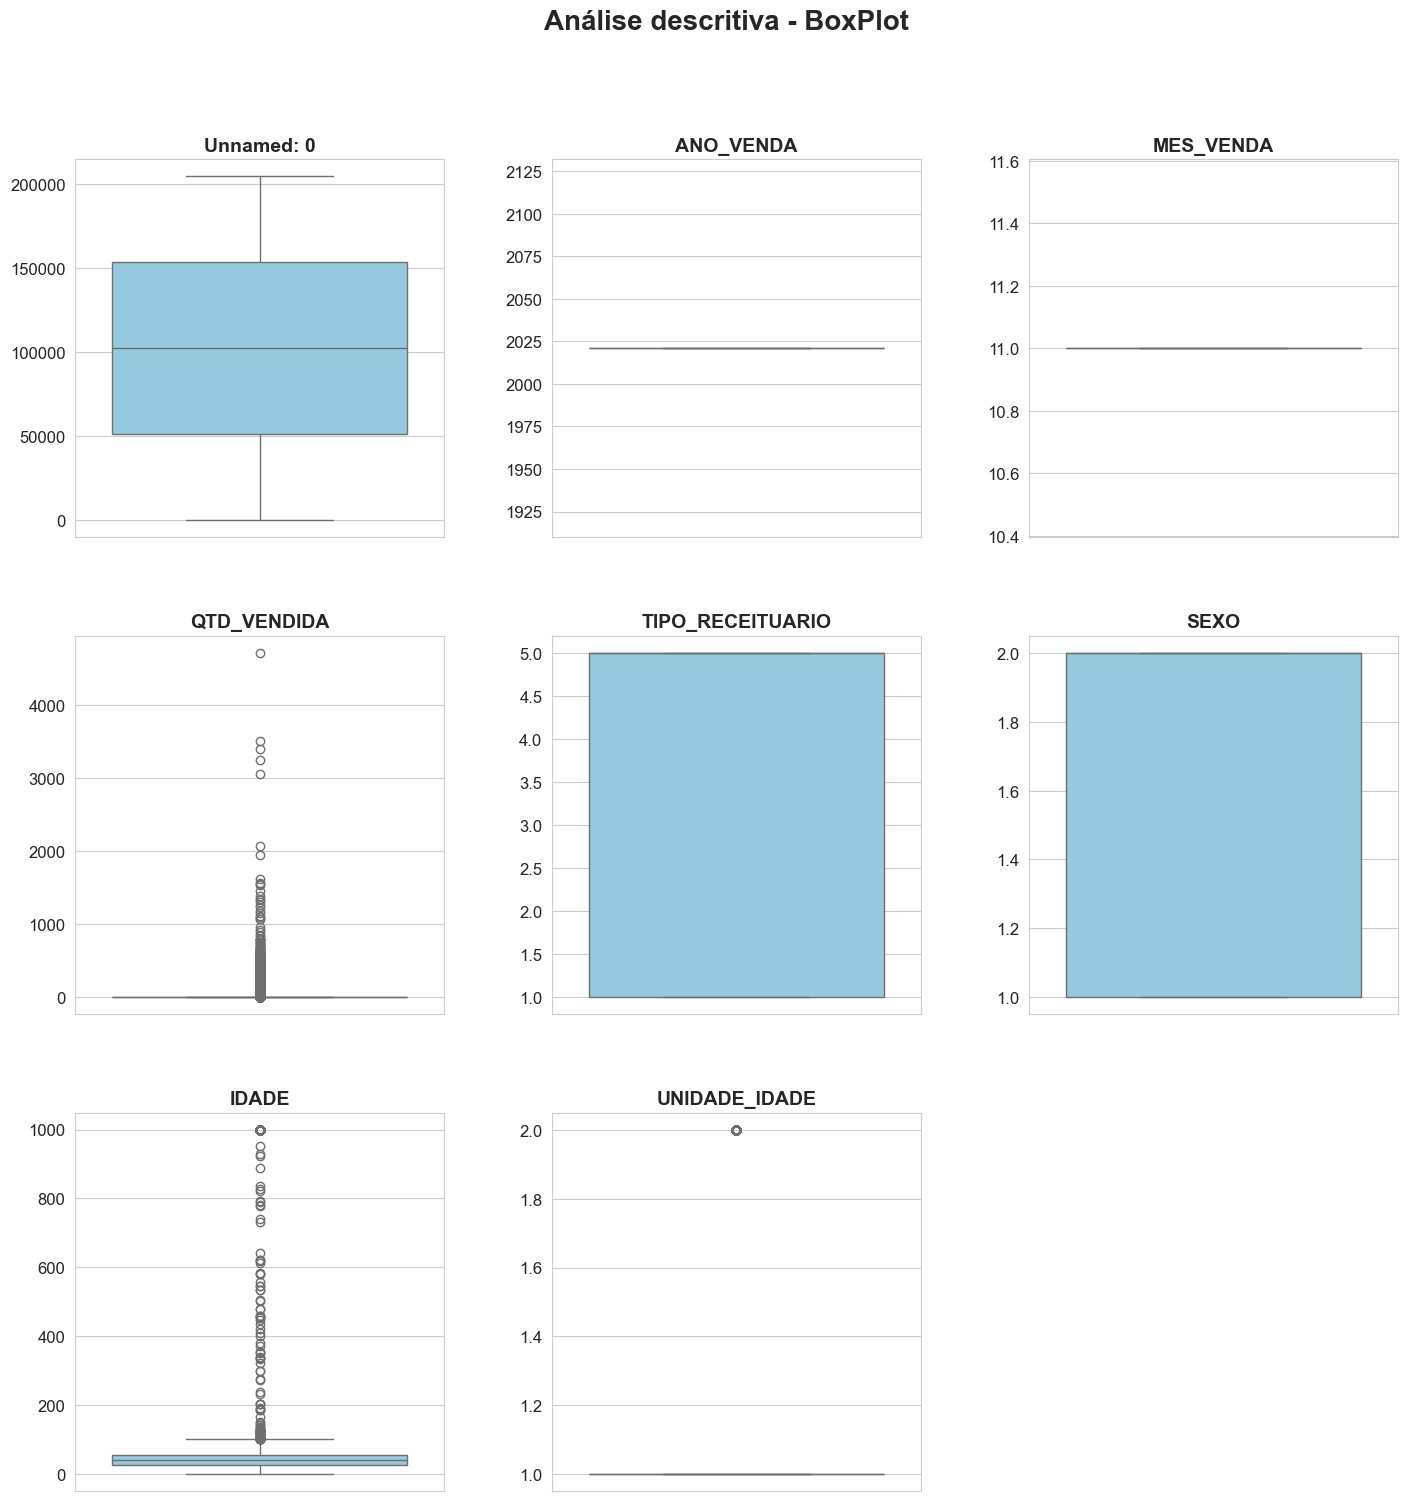

In [40]:
# Podemos fazer Boxplots das variáveis numéricas para ver com estão os outliers e determinar se precisamos ou não de tratamento

pod_academy_box_plot(df_industrial_medics)

2. Os únicos plots que nos dão alguma informação são de 'IDADE' e 'QTD_VENDIDA'. 
    1. Vemos primeiro que temos idades até 1000, provavelmente um erro decimal interpretando 100.0 como 1000 ou os valores nulos estão atrapalhando o cálculo.
    2. E 'QTD_VENDIDA' possui quase todos os dados fora da mediana

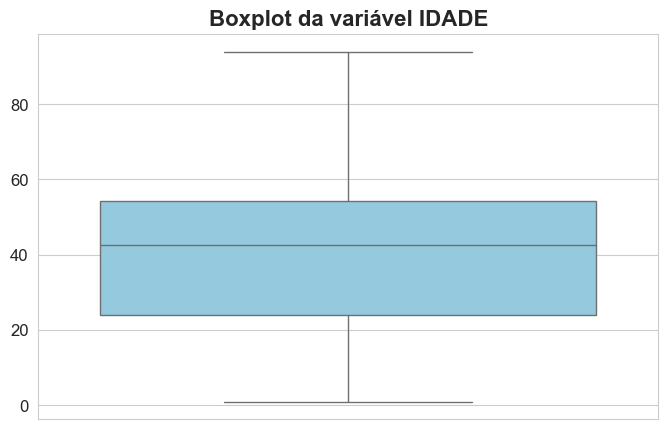

In [41]:
# Primeiro vamos ver o que acontece com o boxplot de 'IDADE' desconsiderando os valores nulos
box_plot(df_industrial_medics.dropna(), 'IDADE')

In [42]:
# Aparentemente o que estava atrapalhando o plot eram os valores nulos,visto que agora não temos outliers, porem se verificarmos os valores unicos da varável 'IDADE' vemos que temos de fato valores acima de 100 anos

df_industrial_medics['IDADE'].unique()

array([ nan,  50.,  75.,  23.,  20.,   6.,  22.,  34.,   1.,  37.,  31.,
        44.,  15.,  25.,   8.,  72.,  47.,  29.,  40.,  39.,  77.,  30.,
        48.,  52.,  36.,  35.,   0.,  80.,   4.,  28.,  55.,  58.,  41.,
        16.,  42.,  66.,  64.,  73.,  78.,  49.,  27.,  10.,  46.,  63.,
        24.,  62.,  61.,  68.,  56.,  26.,   5.,  17.,  12.,   7.,  57.,
        45.,  54.,  38.,  59.,  32.,  65.,  60.,  14.,   2.,  13.,  67.,
        71.,  33.,  51.,   3.,  11.,  43.,  18.,  21.,  81.,  83.,  70.,
        79.,   9.,  19.,  84.,  76.,  53.,  82.,  74.,  69.,  90.,  91.,
        85.,  93.,  87.,  89.,  96.,  92., 999.,  95., 104.,  97.,  88.,
       102.,  86., 122., 121., 147., 100.,  99., 109., 733., 130.,  94.,
       739., 137.,  98., 582., 101., 323., 952., 618., 276., 436., 105.,
       123., 202., 118., 408., 107., 188., 117., 478., 458., 446., 420.,
       354., 334., 545., 534., 400., 112., 352., 370., 506., 558., 142.,
       455., 923., 190., 339., 150., 614., 789., 10

In [43]:
# Nesse caso poodemos contar quantos são os valores acima de 100 anos e verificarmos se esses outliers são relevantes para a análise

df_industrial_medics[df_industrial_medics['IDADE'] > 100].count()

Unnamed: 0                357
ANO_VENDA                 357
MES_VENDA                 357
UF_VENDA                  357
MUNICIPIO_VENDA           357
PRINCIPIO_ATIVO           357
DESCRICAO_APRESENTACAO    357
QTD_VENDIDA               357
UNIDADE_MEDIDA            357
CONSELHO_PRESCRITOR       357
UF_CONSELHO_PRESCRITOR    357
TIPO_RECEITUARIO          357
CID10                       0
SEXO                      357
IDADE                     357
UNIDADE_IDADE             357
dtype: int64

In [44]:
# Possuimos 357 valores de idade acima de 100 anos, vamos ver o que está acontecendo com esses dados selecionando um valor de dade acima de 100 em específico para ver a relalção

df_industrial_medics[df_industrial_medics['IDADE'] == 999]

,Unnamed: 0,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
2122,109487,2021,11,MG,SANTOS DUMONT,FENOBARBITAL,100 MG COM CT BL AL PLAS TRANS X 20,4,CAIXA,CRM,MG,3.0,NaN,1.0,999.0,1.0
4422,110871,2021,11,MG,SANTOS DUMONT,OXALATO DE ESCITALOPRAM,10 MG COM REV CT BL AL PLAS OPC X 30,4,CAIXA,CRM,MG,3.0,NaN,1.0,999.0,1.0
5224,109485,2021,11,MG,SANTOS DUMONT,FENOBARBITAL,100 MG COM CT BL AL PLAS PVC TRANS X 30,4,CAIXA,CRM,MG,3.0,NaN,1.0,999.0,1.0
5438,108666,2021,11,MG,SANTOS DUMONT,CLORIDRATO DE VENLAFAXINA,"37,5 MG CAP DURA LIB PROL CT BL AL PLAS TRANS ...",3,CAIXA,CRM,MG,3.0,NaN,1.0,999.0,1.0
12346,110918,2021,11,MG,SANTOS DUMONT,PREGABALINA,150 MG CAP DURA CT BL AL PLAS TRANS X 30,3,CAIXA,CRM,MG,3.0,NaN,1.0,999.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194206,105183,2021,11,MG,SANTOS DUMONT,CLORIDRATO DE BUPROPIONA,150 MG COM REV LIB PROL CT BL AL AL X 60,1,CAIXA,CRM,MG,3.0,NaN,2.0,999.0,1.0
196046,107934,2021,11,MG,SANTOS DUMONT,CLORIDRATO DE FLUOXETINA,20MG COM REV CT BL AL PLAS OPC X 30,5,CAIXA,CRM,MG,3.0,NaN,1.0,999.0,1.0
196241,110076,2021,11,MG,SANTOS DUMONT,HEMIFUMARATO DE QUETIAPINA,50 MG COM REV LIB PROL CT BL PLAS TRANS AL X 30,2,CAIXA,CRM,MG,3.0,NaN,1.0,999.0,1.0
198418,105151,2021,11,MG,SANTOS DUMONT,CLONAZEPAM,2 MG COM CT BL AL PLAS PVDC OPC X 30,9,CAIXA,CRM,MG,2.0,NaN,2.0,999.0,1.0


3. Vemos que por exemplo para uma idade de 999 anos temos compras no mesmo 'UF' e mesmo 'MUNICIIPO_VENDA', indicando que foi a mesma entidade a compradora, provavelmente uma empresa e não uma pessoa, dito isso para analises de idade precisamos utilizar filtros se quisermos determinar padroes e tendencias.

* Converter tipos de dados, se necessário, garantindo que colunas relacionadas a datas estejam no formato correto.

1. Não é preciso converter varíaveis nessa base de dados

## 2. Análise Exploratória de Dados (EDA):

* Tendências de Vendas:
    - Vendas mensais: Identificar se há meses com vendas excepcionalmente altas ou baixas.
    - Análise por estado (UF_VENDA): Quais estados têm o maior número de vendas? Existem padrões regionais?

1. Não é possível verifiicar e comparar compras entre meses pois a base de dados se trata das vendas de um mes específico

2. Para a análise estadual e regional podemos primeiro fazer um histograma de qual o 'UF_VENDA' mais frequente

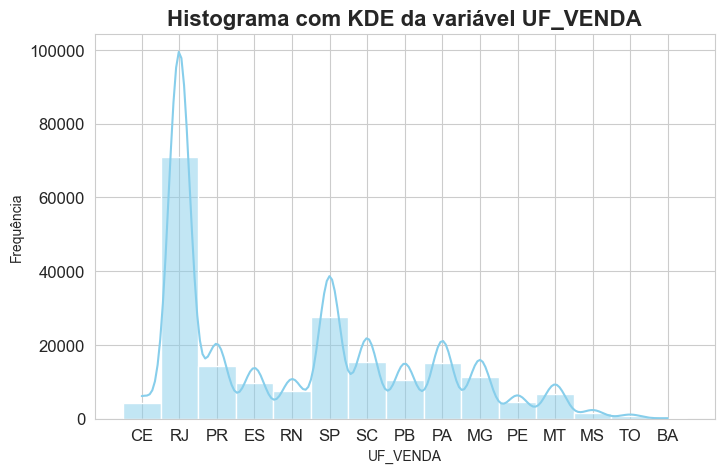

In [45]:
# Histograma da variável 'UF_VENDA'

histogram(df_industrial_medics, 'UF_VENDA')

In [46]:
# Para verificar tendencias regionais podemos adicionar uma coluna com a região do Brasil a qual a UF pertence

# Dicionário com as regiões do Brasil
regioes = {
    'NORTE': ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO'],
    'NORDESTE': ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA'],
    'CENTRO-OESTE': ['MT', 'MS', 'GO', 'DF'],
    'SUDESTE': ['SP', 'RJ', 'ES', 'MG'],
    'SUL': ['PR', 'SC', 'RS']
}

# Mapeia as UFs para as regiões
regiao = []
for uf in df_industrial_medics['UF_VENDA']:
    for key, value in regioes.items():
        if uf in value:
            regiao.append(key)

# Adiciona a coluna 'REGIAO' ao DataFrame
df_industrial_medics['REGIAO_VENDA'] = regiao

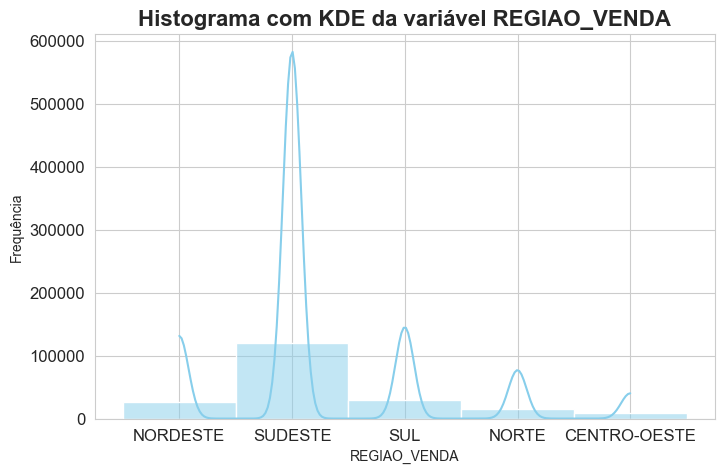

In [48]:
# Podemos agora plotar o histograma da variável 'REGIAO_VENDA'

histogram(df_industrial_medics, 'REGIAO_VENDA')

3. Vemos que temos uma tendência de compra na região sudeste, principalmente no estado do rio de janeiro

4. Também é possível relizar uma análise de quais municípios em cada estado compram mais, precisaríamos plotar um conjunto de graficos por estado, que poderiam ser separados por região

* Produtos Mais Vendidos:
    - Baseado no PRINCIPIO_ATIVO: Quais são os medicamentos mais populares?
    - Baseado na DESCRICAO_APRESENTACAO: Quais apresentações ou dosagens são mais vendidas?


* Demografia dos Consumidores:
    - Distribuição de idade dos compradores.
    - Distribuição de gênero dos compradores.


* Correlações:
    - Existe uma correlação entre o tipo de medicamento e a idade do comprador?
    - Existe uma correlação entre o gênero do comprador e o tipo de medicamento?


## 3. Visualização de Dados:

* Gráficos de barras para mostrar as vendas por estado, por medicamento e por gênero.


* Histogramas para distribuição de idade.


* Heatmaps para correlações.


* Gráficos de linha para tendências de vendas ao longo dos meses.

## 4. Insights e Recomendações:

* Com base na EDA, identifique insights interessantes sobre os hábitos de compra e padrões.


* Formule recomendações para farmácias ou empresas farmacêuticas com base nas tendências observadas.

# Montar uma apresentação com até 5 slides sobre minha análise

### Slide 1: Título e Introdução

* Título: "Análise de Vendas Farmacêuticas"
* Subtítulo: Uma visão geral das vendas de medicamentos.

### Slide 2: Metodologia e Limpeza de Dados


* Título: "Metodologia e Preparação de Dados"
* Pontos Principais:
    - Breve descrição dos dados: O que cada coluna representa.
    - Como os valores ausentes foram tratados.
    - Como os outliers foram identificados e tratados.
* Gráfico/Imagem: Uma visualização que mostre, por exemplo, a quantidade de dados ausentes por coluna ou um gráfico de caixa mostrando a distribuição de uma variável-chave.

### Slide 3: Tendências e Padrões de Vendas



* Título: "Tendências de Vendas por Região e Tempo"
* Pontos Principais:
    - Vendas totais por estado.
    - Meses com maiores e menores vendas.
* Gráficos:
    - Gráfico de barras mostrando vendas por estado.
    - Gráfico de linha mostrando a tendência de vendas ao longo dos meses.

### Slide 4: Informações Demográficas


* Título: "Perfil do Consumidor"
* Pontos Principais:
    - Distribuição de idade dos compradores.
    - Distribuição de gênero dos compradores.
* Gráficos:
    - Histograma para distribuição de idade.
    - Gráfico de barras ou torta para distribuição de gênero.

### Slide 5: Conclusões e Recomendações


* Título: "Insights e Próximos Passos"
* Pontos Principais:
    - Quais medicamentos ou apresentações são os mais vendidos e onde.
    - Insights sobre preferências demográficas.
    - Recomendações para estratégias de marketing ou distribuição.
* Imagem: Uma imagem que represente estratégia ou planejamento.